## Q1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [3]:
df = pd.read_csv('diwali_dataset.csv',encoding='ISO-8859-1')

## Q3. Find the shape of the data

In [4]:
df.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [5]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [8]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

## Q7. Check for null values and find which columns have null values

In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [12]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count 

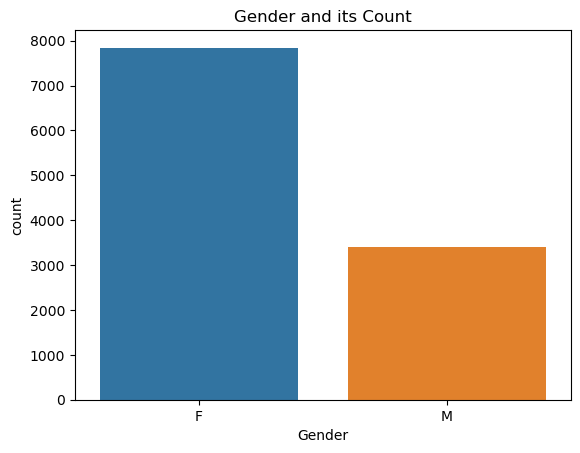

In [15]:
sns.countplot(data=df,x='Gender')
plt.title('Gender and its Count')
plt.show()

## Q10. Plot a bar chart for gender vs total amount 

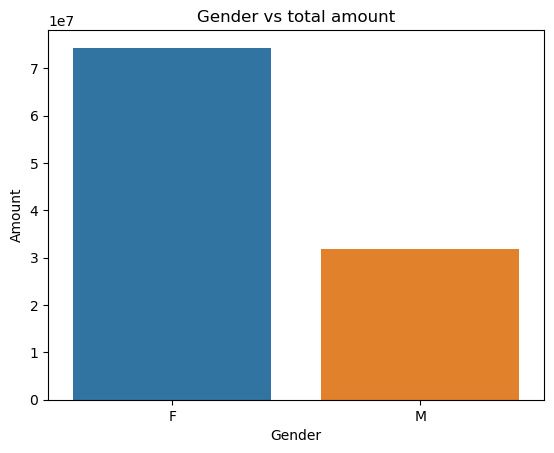

In [16]:
gen_amt = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(data=gen_amt,x='Gender',y='Amount')
plt.title('Gender vs total amount')
plt.show()

## Q11. Plot the countplot for Age Group with hue and Gender

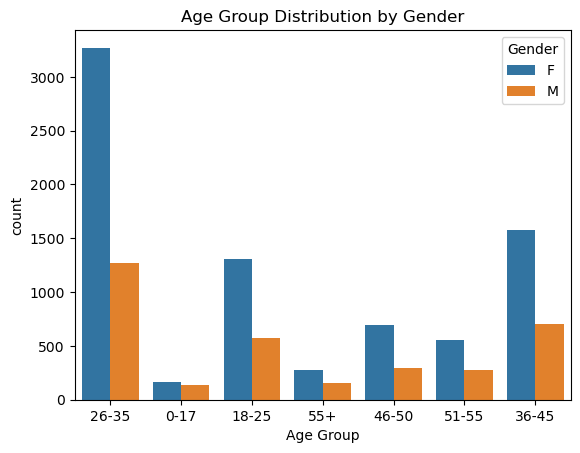

In [17]:
sns.countplot(data =df,x='Age Group', hue='Gender')
plt.title('Age Group Distribution by Gender')
plt.show()

## Q12. Draw the plot for total number of orders from top 10 states 

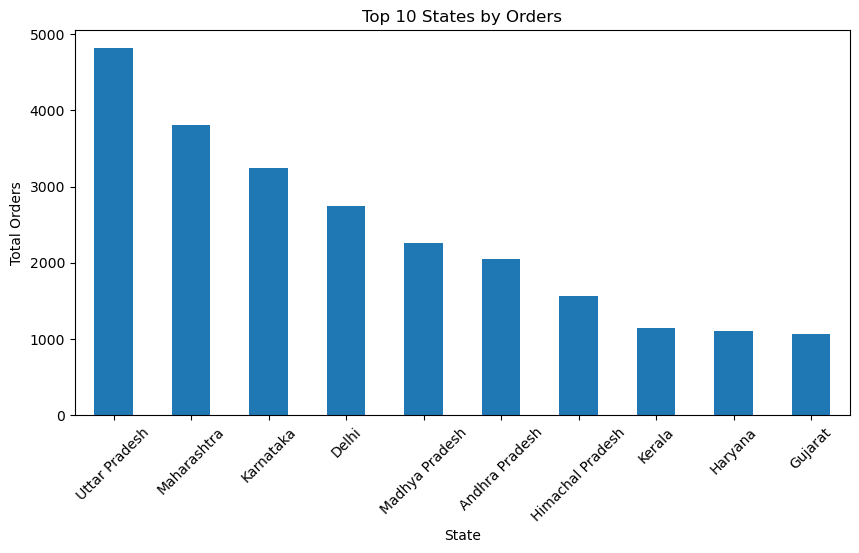

In [18]:
top_states = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar',figsize=(10,5))
plt.title("Top 10 States by Orders")
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

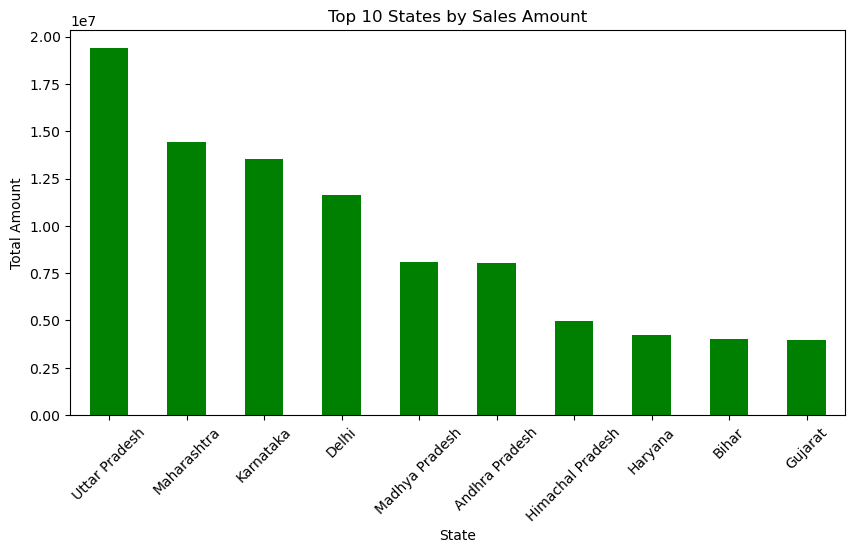

In [19]:
top_states_amt = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states_amt.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Top 10 States by Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

## Q14. Draw the plot to show the marital status 

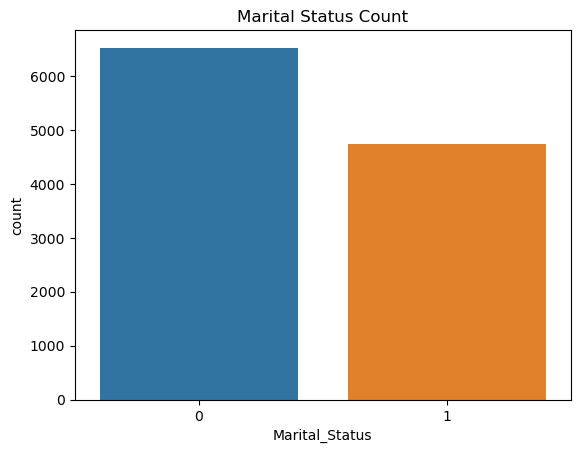

In [20]:
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Count')
plt.show()


## Q15. Draw the plot to show the top 10 occupations

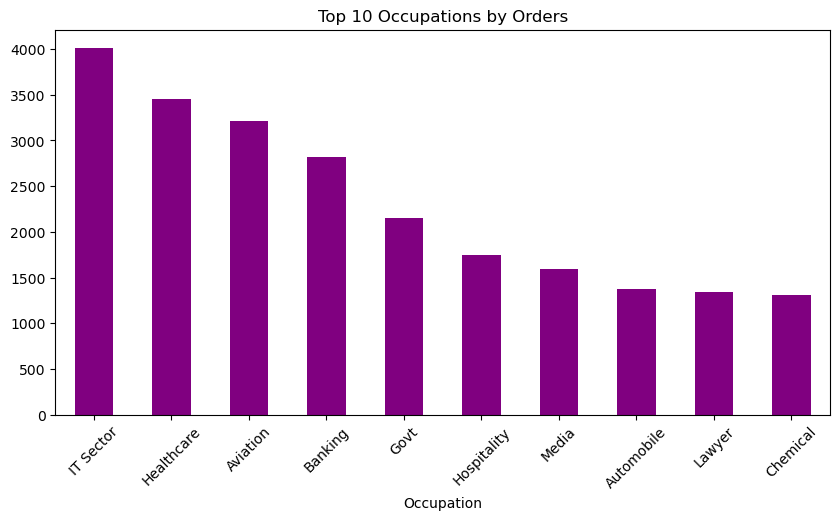

In [21]:
top_occupations = df.groupby('Occupation')['Orders'].sum().sort_values(ascending=False).head(10)
top_occupations.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Top 10 Occupations by Orders')
plt.xticks(rotation=45)
plt.show()

## Q16. Draw the countplot to print the top 10 categories 

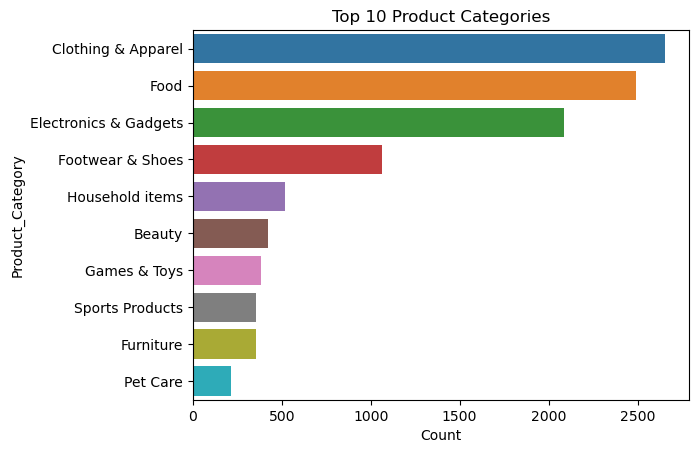

In [22]:
top_categories = df['Product_Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Count')
plt.show()


## Q17. What is the prodct ID of the top 10 most sold products.

In [23]:
top_products = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10)
top_products


Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
P00025442     79
P00145042     76
P00117942     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64

## Q18. What conclusion you can draw from the above visualizations. 

# Observations

Gender Count: Female customers significantly outnumber male customers.

Gender vs Total Amount: Female customers contribute a higher total purchase amount than male customers.

Age Group by Gender: Most purchases are made by females in the 26–35 age group, with smaller contributions from other age groups.

Top 10 States by Orders: Uttar Pradesh, Maharashtra, and Karnataka are the leading states by number of orders.

Top 10 States by Sales Amount: Uttar Pradesh and Maharashtra lead in total purchase amounts, followed by Karnataka and Kerala.

Marital Status Count: Married customers are more prevalent among buyers than unmarried ones.

Top 10 Occupations by Orders: IT Sector, Healthcare, and Aviation professionals are the top contributors to order volume.

Top 10 Product Categories: Clothing & Apparel, Food, and Electronics & Gadgets are the most purchased product categories.